### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
average_precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns
from subprocess import call
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

### Reading Data with missing values less than 92 percent

In [3]:
original_data = pd.read_csv('sepsis_data.psv', sep ='|')
missing_data = original_data.isnull().sum()
missing_percent = (missing_data/original_data.shape[0])*100
refined_columns = list(missing_percent[missing_percent < 92].index)
sepsis_data = original_data[refined_columns]

### Making sure the data is read and saved correctly

In [4]:
refined_columns

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [5]:
sepsis_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [6]:
sepsis_data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.231539e+06,1.185996e+06,459082.000000,1.161992e+06,1.196538e+06,901712.000000,1.163629e+06,124902.000000,222899.000000,129727.000000,126322.000000,1.361672e+06,1.361672e+06,806409.000000,806409.000000,1.361664e+06,1.361672e+06,1.361672e+06
mean,8.463807e+01,9.720677e+01,36.981409,1.233876e+02,8.187102e+01,63.398324,1.873328e+01,0.555864,136.638112,4.139130,30.767546,6.215126e+01,5.624284e-01,0.498618,0.501382,-5.522790e+01,2.707650e+01,1.837080e-02
std,1.728354e+01,2.941111e+00,0.770547,2.302735e+01,1.620716e+01,13.853230,5.149755e+00,11.320101,51.442553,0.639772,5.381143,1.635856e+01,4.960876e-01,0.499998,0.499998,1.634700e+02,2.913055e+01,1.342882e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,-50.000000,10.000000,1.000000,5.500000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.065000e+02,7.050000e+01,54.000000,1.500000e+01,0.400000,106.000000,3.700000,27.100000,5.200000e+01,0.000000e+00,0.000000,0.000000,-4.489000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,0.500000,126.000000,4.100000,30.250000,6.400000e+01,1.000000e+00,0.000000,1.000000,-5.500000e+00,2.100000e+01,0.000000e+00
75%,9.600000e+01,9.950000e+01,37.500000,1.380000e+02,9.100000e+01,71.000000,2.200000e+01,0.600000,153.000000,4.400000,34.000000,7.434000e+01,1.000000e+00,1.000000,1.000000,-3.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,4000.000000,988.000000,27.500000,71.700000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


In [7]:
sepsis_data.isnull().sum()
sepsis_data = sepsis_data.dropna(subset=['HospAdmTime'])

In [8]:
sepsis_data['O2Sat'].min()

20.0

In [9]:
sepsis_data_test = pd.read_csv('sepsis_data_test.psv', sep='|')

In [10]:
sepsis_data_test.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,167343.000000,163544.000000,66161.000000,164017.000000,162466.000000,163966.000000,150313.000000,15165.000000,478.000000,359.000000,...,9988.000000,1075.000000,10149.000000,190615.000000,190615.000000,133841.000000,133841.000000,190615.000000,190615.000000,190615.000000
mean,84.166628,97.099233,36.948108,126.324189,86.299441,66.208423,18.675607,33.113848,-2.303556,23.903900,...,10.836399,284.346512,189.602572,61.004008,0.536595,0.484239,0.515761,-62.517086,26.411096,0.015219
std,17.625333,2.906194,0.765649,24.475479,16.795645,14.275852,4.680407,7.782494,4.336779,3.171466,...,9.168976,138.763003,95.043849,16.548700,0.498660,0.499753,0.499753,153.128765,28.084256,0.122424
min,21.000000,20.000000,30.400000,22.000000,30.000000,20.000000,1.000000,10.000000,-18.250000,12.600000,...,0.100000,35.000000,1.000000,14.000000,0.000000,0.000000,0.000000,-3397.640000,1.000000,0.000000
25%,71.500000,96.000000,36.500000,108.000000,74.000000,56.000000,16.000000,29.000000,-4.400000,22.000000,...,7.100000,187.000000,126.000000,50.000000,0.000000,0.000000,0.000000,-66.670000,10.000000,0.000000
50%,83.000000,98.000000,36.900000,124.000000,84.000000,64.000000,18.000000,33.500000,-1.975000,23.800000,...,9.600000,260.000000,178.000000,62.000000,1.000000,0.000000,1.000000,-9.430000,20.000000,0.000000
75%,95.000000,99.000000,37.400000,142.000000,96.000000,74.000000,21.000000,38.000000,0.300000,25.550000,...,12.900000,348.000000,237.000000,73.000000,1.000000,1.000000,1.000000,-3.230000,34.000000,0.000000
max,191.000000,100.000000,41.800000,296.000000,300.000000,296.000000,99.000000,100.000000,11.100000,36.400000,...,387.000000,1000.000000,1140.000000,100.000000,1.000000,1.000000,1.000000,0.000000,336.000000,1.000000


## Feature Engineering - Building newer features

### 1.  Age
Three categories - 
- Child - Age less than 10 year 
- Adult - Age more than 10 year and less than 60 years 
- Senior - Age more than 60 

In [11]:
def fe_new_age(data):
    data.loc[data['Age'] >=60, 'new_age'] = 'old'
    data.loc[data['Age'] <10, 'new_age'] = 'infant'
    data.loc[(data['Age'] >=10) & (data['Age'] <60), 
            'new_age'] = 'adult'
    return data


In [12]:
sepsis_data = fe_new_age(sepsis_data)

In [13]:
sepsis_data_test = fe_new_age(sepsis_data_test)

In [14]:
sepsis_data['new_age'].isnull() 

0          False
1          False
2          False
3          False
4          False
           ...  
1361667    False
1361668    False
1361669    False
1361670    False
1361671    False
Name: new_age, Length: 1361664, dtype: bool

### 2. Heart Rate 
The new feature designed for heart rate takes into account both Age and Heart Rate in a patient. It has three categories - normal, abnormal, missing

- The 'normal' HR for a child (Age < 10) is in the range of 70 to 110 beats per minute. 
- The 'normal' HR for a adult and senior (Age 10+) is in the range of 60 to 100 
- Any other values recorded is marked as 'abnormal'. 
- The value 'missing' is filled in place of null/nan values



In [15]:
def fe_new_hr(data):
    data.loc[(data['HR'] >= 70) & (data['HR'] < 110 ) & (data['Age'] < 10), 'new_hr'] = 'normal'
    data.loc[(data['HR'] > 60) & (data['HR'] < 100) & data['Age'] >= 10, 'new_hr'] = 'normal'
    data.loc[((data['HR'] < 70) | (data['Age'] >= 110)) & (data['Age']<10), 'new_hr'] = 'abnormal'
    data.loc[(data['HR'] >= 100) & (data['Age'] >= 10), 'new_hr'] = 'abnormal'
    data['new_hr'].fillna('Missing', inplace=True)
    return data


In [16]:
sepsis_data = fe_new_hr(sepsis_data)
sepsis_data_test = fe_new_hr(sepsis_data_test)

### 3. O2Sat

The blood oxygen level measured with an oximeter is called your oxygen saturation level. This is a percentage of how much oxygen your blood is carrying compared to the maximum it is capable of carrying.

The new feature designed for pulse oximetry takes into three catogories
- 'Normal' is found to be between 95% - 100% in healthy children and adults alike
- 'Abnormal' is for anything otherwise 
- 'Missing' is a null or nan case is observed



In [17]:
def fe_new_o2sat(data):
    data.loc[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), 'new_o2sat'] = 'normal'
    data.loc[(data['O2Sat'] < 95) & (data['O2Sat'] >= 0), 'new_o2sat'] = 'abnormal'
    data['new_o2sat'].fillna('missing', inplace=True)
    return data

In [18]:
sepsis_data = fe_new_o2sat(sepsis_data)
sepsis_data_test = fe_new_o2sat(sepsis_data_test)

### 4. Temperature

The new feature designed for temperature takes into three categories:

- Body temperature for any healthy person (child, adult and senior alike) is 'normal' when found between 36 Deg C to 38 Dec C. 
- Anything above or below this range is labeled as 'abnormal'
- 'Missing' is a null or nan case is observed

In [19]:
def fe_new_temp(data):
    data.loc[(data['Temp'] >= 36) & (data['Temp'] < 38),'new_temp'] = 'normal'
    data.loc[(data['Temp'] < 36) | (data['Temp'] >= 38),'new_temp'] = 'abnormal'
    data['new_temp'].fillna('Missing', inplace=True)
    return data

In [20]:
sepsis_data = fe_new_temp(sepsis_data)
sepsis_data_test = fe_new_temp(sepsis_data_test)

### 5. Blood Pressure

We will be combining two forms of Blood Pressure here - Systolic blood pressure (SBP) and Diastolic Blood Pressure(DBP) in the dataset.

- SBP - When your heart beats, it squeezes and pushes blood through your arteries to the rest of your body. This force creates pressure on those blood vessels, and that's your systolic blood pressure

- DBP - The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.

- The new feature will compare the two BP and according to the below table categorize into four categories - low, normal, elevated and high, and missing 

<img src="Saved_Figures/BP.png">


In [21]:
def fe_new_bp(data):
    data.loc[(data['SBP'] < 90) & (data['DBP'] < 60), 'new_bp'] = 'low'
    data.loc[(data['SBP'].between(90,120, inclusive=True)) & (data['DBP'].between(60,80, inclusive=True)), 'new_bp'] = 'normal'
    data.loc[(data['SBP'].between(120,140, inclusive=True)) & (data['DBP'].between(80,90, inclusive=True)),'new_bp'] = 'elevated'
    data.loc[(data['SBP'] > 140 ) & (data['DBP'] > 90 ), 'new_bp'] = 'high'
    data['new_bp'].fillna('Missing', inplace=True)
    return data


In [22]:
sepsis_data = fe_new_bp(sepsis_data)
sepsis_data_test = fe_new_bp(sepsis_data_test)

### 6. Respiration Rate 

The new feature designed will have 3 categories - normal, abnormal and missing. The normal respiratory rate for different age groups are as shown below:

- For healthy adults (Age > 18) is between 12 and 20 breaths per minute.
- Normal respiratory rates for children in breaths per minute are as follows:

    - birth to 1 year: 30 to 60
    - 1 to 3 years: 24 to 40
    - 3 to 6 years: 22 to 34
    - 6 to 12 years: 18 to 30
    - 12 to 18 years: 12 to 16
    
- Any other range for respiratory rates are labeled as 'abnormal' and the missing values are labeled as 'missing'
    

In [23]:
def fe_new_resp(data):
    data.loc[(data['Resp'].between(30, 60)) & (data['Age'] < 1), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(24, 40)) & (data['Age'].between(1, 3)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(22, 34)) & (data['Age'].between(3, 6)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(18, 30)) & (data['Age'].between(6, 12)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(12, 16)) & (data['Age'].between(12, 18)), 'new_resp'] = 'normal'  
    data.loc[(data['Resp'].between(12, 20)) & (data['Age'] > 18), 'new_resp'] = 'normal'  
    
    data.loc[((data['Resp'] < 30) | (data['Resp'] > 60)) & (data['Age'] <1) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 24) | (data['Resp'] > 40)) & (data['Age'].between(1, 3)) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 22) | (data['Resp'] > 34)) & (data['Age'].between(3, 6)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 18) | (data['Resp'] > 30)) & (data['Age'].between(6, 12)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 16)) & (data['Age'].between(12, 18)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 20)) & (data['Age'] > 18) ,'new_resp'] = 'abnormal'
    
    
    data['new_resp'].fillna('missing', inplace = True)
                                                            
    return data
    

In [24]:
sepsis_data = fe_new_resp(sepsis_data)
sepsis_data_test = fe_new_resp(sepsis_data_test)

### 7. Mean Arterial Pressure

https://emtprep.com/free-training/post/map-understanding-mean-arterial-pressure

MAP is the measurement that explains the average blood pressure in a person's blood vessels during a single cardiac cycle. Mean arterial pressure is significant because it measures the pressure necessary for adequate perfusion of the organs of the body.

The normal MAP range is between 70 and 100 mmHg.
 - High MAP can cause stress on the heart because it has to work harder than normal to push against the elevated pressure in the vessels.
 - When the MAP gets below 60, vital organs in the body do not get the nourishment they need for survival
 
 
MAP is directly affected by factors such as:

• Amount of blood pumped out of the heart per minute (cardiac output)

• Heart rate (beats per minute)

• Blood pressure

• Resistance to blood flow in the vessels

A change in any of these factors will alter the mean arterial pressure and cause negative effects on the body



In [25]:
def fe_new_map(data):
    data.loc[(data['MAP'] >= 70) & (data['MAP'] < 100),'new_map'] = 'normal'
    data.loc[(data['MAP'] < 70) | (data['MAP'] >= 100),'new_map'] = 'abnormal'
    data['new_map'].fillna('Missing', inplace=True)
    return data

In [26]:
sepsis_data = fe_new_map(sepsis_data)
sepsis_data_test = fe_new_map(sepsis_data_test)

### 8. Fraction of inspired oxygen

The percentage of individual gases in air (oxygen, nitrogen, etc.) doesn't change with altitude, but the
atmospheric (or barometric) pressure does. FIO2, the fraction of inspired oxygen in the air, is thus 21%
(or .21) throughout the breathable atmosphere. 


In [27]:
def fe_new_fio2(data):
    data.loc[(data['FiO2'] < 0.8 ) ,'new_fio2'] = 'normal'
    data.loc[(data['FiO2'] >= 0.8 ),'new_fio2'] = 'abnormal'
    data['new_fio2'].fillna('Missing', inplace=True)
    return data

In [28]:
sepsis_data = fe_new_fio2(sepsis_data)
sepsis_data_test = fe_new_fio2(sepsis_data_test)

## Check if all the new columns are correct 

In [29]:
sepsis_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,...,ICULOS,SepsisLabel,new_age,new_hr,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,old,Missing,missing,Missing,Missing,missing,Missing,Missing
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,2,0,old,Missing,normal,Missing,Missing,normal,normal,Missing
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,3,0,old,Missing,normal,Missing,Missing,abnormal,normal,Missing
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,...,4,0,old,Missing,normal,Missing,Missing,abnormal,Missing,Missing
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,NaN,...,5,0,old,abnormal,abnormal,Missing,Missing,abnormal,normal,normal


In [30]:
sepsis_data_test.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,ICULOS,SepsisLabel,new_age,new_hr,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,old,Missing,missing,Missing,Missing,missing,Missing,Missing
1,67.0,95.0,NaN,165.5,106.0,76.0,NaN,NaN,NaN,NaN,...,2,0,old,Missing,normal,Missing,Missing,missing,abnormal,Missing
2,62.0,95.0,36.0,161.0,104.0,75.0,NaN,NaN,NaN,NaN,...,3,0,old,Missing,normal,normal,Missing,missing,abnormal,Missing
3,68.0,96.0,NaN,155.5,101.5,73.5,NaN,NaN,NaN,NaN,...,4,0,old,Missing,normal,Missing,Missing,missing,abnormal,Missing
4,65.0,95.0,36.1,142.0,87.0,61.0,NaN,NaN,NaN,NaN,...,5,0,old,Missing,normal,normal,Missing,missing,normal,Missing


## Feature Selection - Selecting relevant features for prediction

In [31]:
columns_new = ['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp', 'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS']


In [32]:
target_col = ['SepsisLabel']

test_cols = columns_new + target_col


In [33]:
all_data_train = sepsis_data[test_cols]
all_data_test = sepsis_data_test[test_cols]

In [34]:
print(all_data_train.shape)
print(all_data_test.shape)

(1361664, 12)
(190615, 12)


In [35]:
all_data_train_df = all_data_train.to_csv ('fe_train.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
all_data_test_df = all_data_test.to_csv ('fe_test.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [36]:
all_data_test.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-43.69,1,0
1,1,old,normal,Missing,Missing,missing,abnormal,Missing,Missing,-43.69,2,0
2,1,old,normal,normal,Missing,missing,abnormal,Missing,Missing,-43.69,3,0
3,1,old,normal,Missing,Missing,missing,abnormal,Missing,Missing,-43.69,4,0
4,1,old,normal,normal,Missing,missing,normal,Missing,Missing,-43.69,5,0


In [37]:


X_train = sepsis_data[columns_new]
y_train = sepsis_data['SepsisLabel']

X_test = sepsis_data_test[columns_new]
y_test = sepsis_data_test['SepsisLabel']

In [38]:
X_train.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS
0,0,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.03,1
1,0,old,normal,Missing,Missing,normal,normal,Missing,Missing,-0.03,2
2,0,old,normal,Missing,Missing,abnormal,normal,Missing,Missing,-0.03,3
3,0,old,normal,Missing,Missing,abnormal,Missing,Missing,Missing,-0.03,4
4,0,old,abnormal,Missing,Missing,abnormal,normal,normal,abnormal,-0.03,5


In [39]:
# Problem - Make sure all the items in the columns are oneHotencoded

In [40]:
#_ = scatter_matrix(X_train, figsize = [8,8], s=150, marker = 'D')

In [41]:
"""plt.figure()
sns.countplot(x = 'Gender', hue = 'SepsisLabel', data = sepsis_data)
plt.xticks([0,1], ['Female', 'Male'])
plt.show()"""

"plt.figure()\nsns.countplot(x = 'Gender', hue = 'SepsisLabel', data = sepsis_data)\nplt.xticks([0,1], ['Female', 'Male'])\nplt.show()"

## Imputation for Missing values and Scaling the vales

#### Building a sklearn pipeline to do all the work all at once. 

In [42]:
sepsis_data['SepsisLabel'].value_counts()

0    1336649
1      25015
Name: SepsisLabel, dtype: int64

In [43]:
# Func 1
values = X_train.dtypes == object
values['Gender'] = True

In [44]:
# Func 2 - cat_pipeline
one_hot = OneHotEncoder( categorical_features=None, categories=None, drop=None, handle_unknown='ignore', n_values=None, sparse=True)
steps = [('onehotencoder', one_hot)]
one_hot_pipe = Pipeline(steps, memory=None, verbose=False)

one_hot_pipe

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', n_values=None,
                               sparse=True))],
         verbose=False)

In [45]:
# Func 3 - cont_scale_pipeline

steps_simp_scal =[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=np.nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))]
simp_scal_pipe = Pipeline(steps_simp_scal, memory=None, verbose=False)


In [46]:
# Func 4 - keep same

transform_col_pipe = make_column_transformer((simp_scal_pipe, 
                                                  ~values), 
                                                 (one_hot_pipe, values))
transform_col_pipe

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('pipeline-1',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
      

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361664 entries, 0 to 1361671
Data columns (total 11 columns):
Gender         1361664 non-null int64
new_age        1361664 non-null object
new_o2sat      1361664 non-null object
new_temp       1361664 non-null object
new_bp         1361664 non-null object
new_resp       1361664 non-null object
new_map        1361664 non-null object
new_fio2       1361664 non-null object
new_hr         1361664 non-null object
HospAdmTime    1361664 non-null float64
ICULOS         1361664 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 124.7+ MB


### Logistic Regression

In [48]:
# Func 5 - 

log_reg_scale = make_pipeline(transform_col_pipe, LogisticRegression( C= 0.01, solver = 'lbfgs', dual=False))

log_reg_model = log_reg_scale.fit(X_train, y_train)

In [49]:
#Func 6 -
predicted = log_reg_scale.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[187707,      7],
       [  2895,      6]])

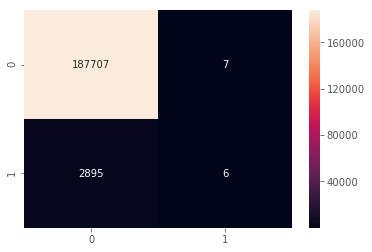

In [50]:
sns.heatmap(conf_matrix, annot=True, fmt="d");

In [51]:
# Func 7 -
def score_model(model, metric_list, y_true, y_pred):
    metric_dict = {'precision' :  precision_score, 'recall' : recall_score, 
                 'confusion_matrix' : confusion_matrix, 
                 'avg_precision': average_precision_score,
                  'accuracy_score': accuracy_score}
    df = pd.DataFrame()
    df['model'] = [model]
    for metric in metric_list:
        df[metric] = [metric_dict[metric](y_true, y_pred)]
    return df

In [52]:
score_model('Logistic_regression', ['recall','precision', 'avg_precision', 'accuracy_score'],
            y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Logistic_regression,0.002068,0.461538,0.016142,0.984776


### SVM

In [53]:
svm_scale = make_pipeline(transform_col_pipe, SVC())

In [54]:
svm_scale

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                           

In [55]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid = GridSearchCV(svm_scale, param_grid=parameteres, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
svm_model = svm_scale.fit(X_train, y_train)

In [ ]:
predicted_svm = svm_scale.predict(X_test)


In [ ]:
score_model('Support Vector Machine', ['recall','precision', 'avg_precision', 'accuracy_score'],
            y_test, predicted)

### Label Encoder

In [59]:
le=LabelEncoder()

In [60]:
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [62]:
X_train.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS
0,0,1,1,0,0,1,0,0,0,-0.03,1
1,0,1,2,0,0,2,2,0,0,-0.03,2
2,0,1,2,0,0,0,2,0,0,-0.03,3
3,0,1,2,0,0,0,0,0,0,-0.03,4
4,0,1,0,0,0,0,2,2,1,-0.03,5


In [ ]:
X_train.tail()

In [145]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190615 entries, 0 to 190614
Data columns (total 11 columns):
Gender         190615 non-null int64
new_age        190615 non-null int64
new_o2sat      190615 non-null int64
new_temp       190615 non-null int64
new_bp         190615 non-null int64
new_resp       190615 non-null int64
new_map        190615 non-null int64
new_fio2       190615 non-null int64
new_hr         190615 non-null int64
HospAdmTime    190615 non-null float64
ICULOS         190615 non-null int64
dtypes: float64(1), int64(10)
memory usage: 16.0 MB


### Training with Logistic Regression

### Log Reg

In [146]:
log=LogisticRegression(penalty='l2',C=.01)

In [147]:
X_train.isnull().sum()

Gender         0
new_age        0
new_o2sat      0
new_temp       0
new_bp         0
new_resp       0
new_map        0
new_fio2       0
new_hr         0
HospAdmTime    0
ICULOS         0
dtype: int64

In [148]:
X_train = X_train.dropna(subset=['HospAdmTime'])

In [149]:
y_train.isnull().sum()

0

In [150]:
log.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
accuracy_score(y_test,log.predict(X_test))

0.9848070718463919

### Training with KNN

### KNN

In [154]:
knn=KNeighborsClassifier(n_neighbors=5)

In [155]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [157]:
accuracy_score(y_test,knn.predict(X_test))

0.9802376518112426

In [158]:
dt = DecisionTreeClassifier()


In [160]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
accuracy_score(y_test,dt.predict(X_test))

0.9658998504839598

In [163]:
predicted_log = log.predict(X_test)
conf_matrix_log = confusion_matrix(y_test, predicted_log)

In [164]:
conf_matrix_log

array([[187713,      1],
       [  2895,      6]])

In [ ]:
"""
https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/
"""